In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

* Student Name: Aswani Pottathuparambil Unnikrishnan
* Student Id: 8858117

PART A
* Use the **Lab2 dataset** provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal 
classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

In [49]:
# Load the dataset Lab2_dataset.csv
df1 = pd.read_csv('C:/Users/aswan/AI/AIML/CSCN8000-lab-submissions/practical_labs/Lab2_dataset.csv')
df1.sample(5)

,Unnamed: 0,label,text,label_num
4102,5164,spam,Subject: epson inkjet cartridges from 5 . 99\n...,1
762,1349,ham,Subject: re : resolved issue : re : meter # 09...,0
4339,2870,ham,Subject: natural gas nomination for 04 / 01\ne...,0
845,1419,ham,"Subject: enron actuals for august 17 , 2000\nt...",0
3922,5001,spam,Subject: v . i . agra for two . dollars . and ...,1


In [50]:
# Split the dataset 
X= df1['text']
y= df1['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Convert text into numerical features
v = CountVectorizer()
X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)

In [52]:
# Gaussian Naive Bayes classifier training & accuracy calculation
g_nb = GaussianNB()
g_nb.fit(X_train_v.toarray(), y_train)
g_nb_predictions = g_nb.predict(X_test_v.toarray())
g_nb_accuracy = accuracy_score(y_test, g_nb_predictions)
print(f' The Gaussian Naive Bayes classifier accuracy is  {g_nb_accuracy}')


 The Gaussian Naive Bayes classifier accuracy is  0.9545893719806763


In [53]:

# Train the Multinomial Naive Bayes classifier training & accuracy calculation
m_nb = MultinomialNB()
m_nb.fit(X_train_v, y_train)
m_nb_predictions = m_nb.predict(X_test_v.toarray())
m_nb_accuracy = accuracy_score(y_test, m_nb_predictions)
print(f'The Multinomial Naive Bayes classifier accuracy is  {m_nb_accuracy}')

The Multinomial Naive Bayes classifier accuracy is  0.9719806763285024


## Observation
* Both classifiers exhibited great predictive performance overall, with high accuracy ratings. The Multinomial Naive Bayes classifier performed better than the Gaussian Naive Bayes classifier, suggesting that a multinomial distribution assumption would be a better fit for the data. 

PART B
* Use this **air bnb new york city dataset** and remove outliers based on price per night for a given apartment/home. 
You can demonstrate why using other techniques like mean/median/ percentile works. 
The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [54]:
df2 = pd.read_csv('C:/Users/aswan/AI/AIML/CSCN8000-lab-submissions/practical_labs/AB_NYC_2019.csv')
df2.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11723,9115832,Lge bedroom (2 pers) in Bushwick,47501348,Margot,Brooklyn,Bushwick,40.69824,-73.93231,Private room,60,1,0,NaN,NaN,1,0
16290,13114443,East Village Spacious 3 Bedroom Across from Park,72931015,Spencer,Manhattan,East Village,40.72527,-73.98347,Entire home/apt,206,1,1,2016-06-05,0.03,1,0
44822,34417565,Friend Hostel,93598122,Evgen,Brooklyn,Brighton Beach,40.58002,-73.96596,Private room,100,2,7,2019-06-23,3.44,1,31
26786,21263008,4 Beds 4 Baths serviced apartment Palazzo Gram...,153735730,Sudha,Manhattan,Gramercy,40.73680,-73.98307,Entire home/apt,766,30,13,2019-06-15,0.66,2,352
21472,17155039,East Harlem QtPoC Living Space,46108407,Walesca,Manhattan,East Harlem,40.80224,-73.93732,Private room,48,1,1,2018-04-28,0.07,1,0


In [55]:
# Create and analyze the price per night column
df2['price_per_night'] = df2['price'] / df2['minimum_nights']
df2.price_per_night


0        149.000000
1        225.000000
2         50.000000
3         89.000000
4          8.000000
            ...    
48890     35.000000
48891     10.000000
48892     11.500000
48893     55.000000
48894     12.857143
Name: price_per_night, Length: 48895, dtype: float64

In [56]:
df2['price_per_night'].describe()


count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

<Axes: ylabel='price_per_night'>

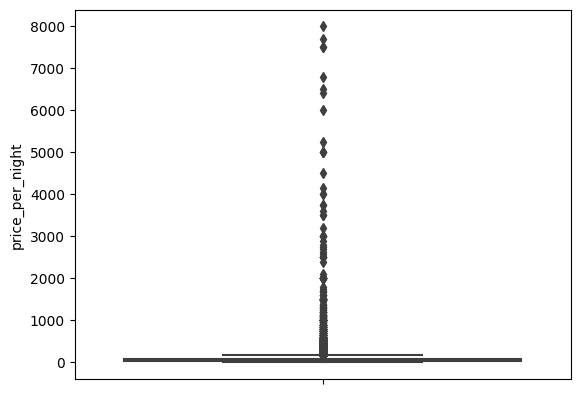

In [57]:
# Draw Boxplot for price_per_night
sns.boxplot(y=df2['price_per_night'])

<Axes: ylabel='price_per_night'>

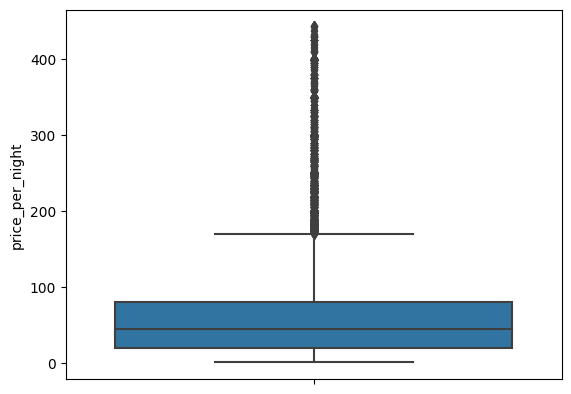

In [58]:
# Outliers removal using percentile-based approach
p_min= df2.price_per_night.quantile(0.01,interpolation = "higher")
p_max= df2.price_per_night.quantile(0.99,interpolation = "lower")
df2_percentile = df2[(df2['price_per_night'] >= p_min) & (df2['price_per_night'] <= p_max)]

# Draw Boxplot for price_per_night
sns.boxplot(y=df2_percentile['price_per_night'])


<Axes: ylabel='price_per_night'>

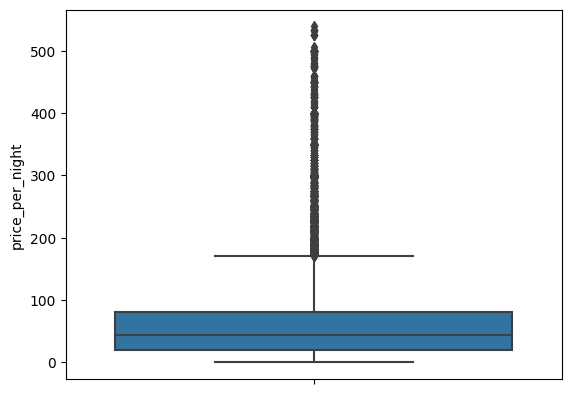

In [59]:
# Outliers removal using using mean and standard deviation approach
p_mean = df2['price_per_night'].mean()
p_std = df2['price_per_night'].std()
threshold = 3 
df2_std = df2[abs(df2['price_per_night'] - p_mean) <= threshold * p_std]
# Draw Boxplot for price_per_night
sns.boxplot(y=df2_std['price_per_night'])

<Axes: ylabel='price_per_night'>

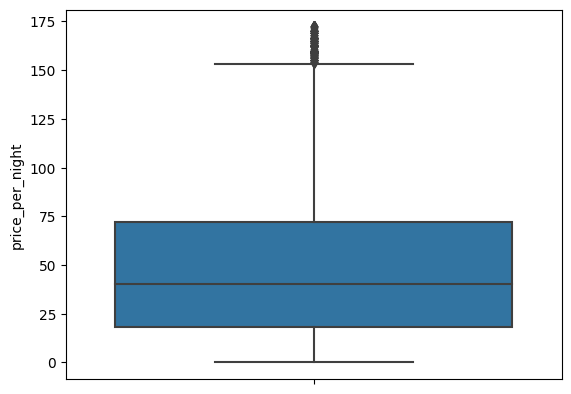

In [60]:
# Outlier removal using IQR
# From the above price_per_night description details we got the first, second and third quartile values are 20,44, 81 respectively.

q1= 20
q2= 44
q3= 81
# IQR = Third quartile- First quartile
iqr = q3- q1

# Calculate lower bound
l_bound = q1 - 1.5 * iqr
# Calculate upper bound
u_bound = q3 + 1.5 * iqr

# Remove outliers
df2_iqr = df2[(df2['price_per_night'] >= l_bound) & (df2['price_per_night'] <= u_bound)]
# Draw Boxplot for price_per_night
sns.boxplot(y=df2_iqr['price_per_night'])

In [61]:
df2['price_per_night'].describe()

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

In [62]:
df2_iqr['price_per_night'].describe()

count    45558.000000
mean        49.170838
std         39.045338
min          0.000000
25%         18.000000
50%         40.000000
75%         72.000000
max        172.500000
Name: price_per_night, dtype: float64

## Observation
* From the boxplots and initial(df2) and final(df2_iqr) datasets,  we can easily identify differences of outliers' presence. df2_iqr dataset contains cleaned data. 